1. Problem Implementation

In [24]:
import numpy as np
import warnings
import matplotlib.pyplot as plot
np.random.seed(10)
pi = np.pi
ten_power_negative_six = np.divide(1, np.power(10, 6))

max_samples = 5000
#max_iter = 8000
t_initial = 90

x1 = np.random.uniform(1,16,1)
x2 = np.random.uniform(1,16,1)
x3 = np.random.uniform(1,16,1)
x4 = np.random.uniform(1,16,1)

x = np.array([x1, x2, x3, x4])

In [25]:
count_f = 0
def f(x):
    global count_f
    count_f += 1
    a = np.divide(np.multiply(P_zero(x), x[0]), 0.7) #(P0(x) * x1)/0.7

    return np.add(a, E_f(x))

In [26]:
def P(x):
    a = np.log10(np.add(np.multiply(8.122, x[3]), 0.8)) #log10(8.122*x4 + 0.8)
    b = np.subtract(np.log10(a), 10.04)  #log10(a) - 10.04
    return np.divide(b,-3.55) #b/-3.55

In [27]:
def delta_T(x):
    a = np.power(10, P(x)) #10^P(x)
    b = np.subtract(a, 560) #a - 560
    return np.multiply(2, b) #2*b

In [28]:
def E_f(x):
    a = np.multiply(143.308, delta_T(x)) #143.308*T(x)
    return np.multiply(a, x[0]) #a*x1

In [29]:
def h(x):
    a = np.square(np.divide(np.multiply(pi, 1500), 60)) #((1500*pi)/60)^2
    b = np.multiply(2, np.multiply(ten_power_negative_six, np.multiply(pi, x[3]))) #2*(10^-6)*pi*x4
    c = np.divide(b, E_f(x)) #b/Ef(x)
    d = np.subtract(np.divide(np.power(x[2], 4), 4), np.divide(np.power(x[1], 4), 4)) #(x3^4)/4 - (x2^4)/4

    return np.multiply(a, np.multiply(c, d)) 

In [30]:
def P_zero(x):
    a = np.multiply(np.multiply(ten_power_negative_six, np.multiply(x[3], x[0])), 6) #6*(10^-6)*x4*x1
    b = np.divide(a, np.multiply(pi, np.power(h(x), 3))) #a/(pi*(h(x))^3)
    c = np.log(np.divide(x[2], x[1])) #ln(x3/x2)

    return np.multiply(b, c)

In [31]:
def W(x):
    a = np.divide(np.multiply(pi, P_zero(x)), 2) #(pi*P0(x)/2)

    b = np.subtract(np.square(x[2]), np.square(x[1])) #x3^2 - x2^2
    c = np.log(np.divide(x[2], x[1])) #ln(x3/x2)
    d = np.divide(b, c)

    return np.multiply(a, d)

In [32]:
count_g1 = 0
def g1(x):
    global count_g1
    count_g1 += 1
    return np.subtract(101000, W(x)) #101000 - W(x)

In [33]:
count_g2 = 0
def g2(x):
    global count_g2
    count_g2 += 1
    return np.subtract(P_zero(x), 1000) #P0(x) - 1000

In [34]:
count_g3 = 0
def g3(x):
    global count_g3
    count_g3 += 1
    return np.subtract(delta_T(x), 50) #T(x) - 50

In [35]:
count_g4 = 0
def g4(x):
    global count_g4
    count_g4 += 1
    return np.subtract(0.001, h(x)) #0.001 - h(x)

In [36]:
count_g5 = 0
def g5(x):
    global count_g5
    count_g5 += 1
    return np.subtract(x[1], x[2]) #x2-x3

In [37]:
count_g6 = 0
def g6(x):
    global count_g6
    count_g6 += 1
    a = np.multiply(0.0307, x[0]) #0.0307*x1
    b = np.multiply(772.8, np.multiply(pi, np.multiply(P_zero(x), np.multiply(h(x), x[2])))) #772.8*pi*P0(x)*h(x)*x3
    return np.subtract(np.divide(a, b), 0.001) #a/b - 0.001

In [38]:
count_g7 = 0
def g7(x):
    global count_g7
    count_g7 += 1
    a = np.subtract(np.square(x[2]), np.square(x[1])) #x3^2 - x2^2
    b = np.divide(W(x), np.multiply(pi, a)) # W(x)/pi*a

    return np.subtract(b, 5000) #b - 5000

In [39]:
def reset_function():
    global count_f, count_g1, count_g2, count_g3, count_g4,count_g5, count_g6, count_g7
    count_f, count_g1, count_g2, count_g3, count_g4,count_g5, count_g6, count_g7 = 0, 0, 0 ,0 ,0 ,0 ,0, 0

In [40]:
#validation code

x_test = np.array([4.19, 11.57, 6.69, 10.65])

print("f(x) =", f(x_test))
print("g1(x) =", g1(x_test))
print("g2(x) =", g2(x_test))
print("g3(x) =", g3(x_test))
print("g4(x) =", g4(x_test))
print("g5(x) =", g5(x_test))
print("g6(x) =", g6(x_test))
print("g7(x) =", g7(x_test))

reset_function()

f(x) = -1784.0773507231927
g1(x) = 101000.01528759542
g2(x) = -1000.0000598304209
g3(x) = -52.97118117373543
g4(x) = -0.9196377239881502
g5(x) = 4.88
g6(x) = -0.1447799968196423
g7(x) = -4999.999945390436


In [41]:
#Test if the x_values are in the constraints
def is_in_constraint(x):
    if(g1(x) > 0):
        return False
    
    if(g2(x) > 0):
        return False
    
    if(g3(x) > 0):
        return False
    
    if(g4(x) > 0):
        return False
    
    if(g5(x) > 0):
        return False
    
    if(g6(x) > 0):
        return False
    
    if(g7(x) > 0):
        return False
    
    return True

In [42]:
def not_max_sample(n):
    if count_f > n:
        return True
    
    if count_g1 > n:
        return True
    
    if count_g2 > n:
        return True
    
    if count_g3 > n:
        return True
    
    if count_g4 > n:
        return True
    
    if count_g5 > n:
        return True
    
    if count_g6 > n:
        return True
    
    if count_g7 > n:
        return True

    return False

2. Random Search

In [43]:
#Random search optimiser
"""
Parameters:
function: the function needed to optimised
max_iter: the maximum of iterations to run
lower: lower bound of the values
upper: upper bound of the values
"""
def random_search(function, max_iter, lower, upper):
       points_to_evaluate = np.random.uniform(lower , upper, size= (max_iter, 4))
       results = np.array([])
       
       for point in points_to_evaluate:
              if not_max_sample(max_samples):
                     break
              if(is_in_constraint(point)):
                     result = function(point)
                     results = np.append(results, result)
       
       if results.size == 0:
              reset_function()
              return 1000000
       else:
              best = np.argmin(results)
              reset_function()
              return results[best]
       

print(random_search(f, max_samples, 1, 16))

50507.77458894449


3. Simmulated Annealing

In [44]:
#Simmulated Annealing optimiser
"""
Parameters:
function: the function needed to optimised
max_iter: the maximum of iterations to run
lower: lower bound of the values
upper: upper bound of the values
t_i: initial temparature for the cooling
"""
def simulated_annealing(function, max_iter, lower, upper, t_i):
    x_best = np.random.uniform(lower, upper, size = (4))

    #find a different initial value, if doesn't meet the constraints
    while not is_in_constraint(x_best):
        x_best = np.random.uniform(lower, upper, size = (4))

    y_best = function(x_best)
    x_c = x_best
    y_c = y_best

    #standard deviation for the candidate values
    standard_deviation = np.multiply(np.subtract(upper, lower), 0.1)

    for i in range(1, (max_iter)):
        #stop loop if hit maximum number of samples
        if not_max_sample(max_samples):
            break
        
        x_cand = np.random.normal(x_c, standard_deviation)
        y_cand = function(x_cand)

        #skip the candidate if it's outside the constraints
        if not is_in_constraint(x_cand):
            continue

        y_change = y_cand - y_c

        #fast cooling
        t_k = t_i/i
        warnings.filterwarnings('ignore') 
        exp = np.divide(np.negative(y_change), t_k)
        acceptance = np.exp(exp)
        
        if y_change <= 0 or np.random.uniform(0, 1) < min(acceptance, 1):
            x_c, y_c = x_cand, y_cand
        
        if y_cand < y_best:
            x_best, y_best = x_cand, y_cand

    reset_function()
    return y_best

print(simulated_annealing(f, max_samples, 1, 16, t_initial))

43039.665298376305


4. Performance Evaluation

Null hypothesis: We assume Random Seach and Simmulated Annealing do not have much significant differences


alpha value = 5%


[35625.42694284964, 44497.32981374546, 52786.9926132556, 47126.96748574094, 80602.35650215259, 66188.2742706025, 56302.979982610304, 82217.54077290338, 63215.66416238829, 47479.90582212873, 84143.4198676536, 55984.98086947332, 48922.63910452842, 51201.95195123653, 81495.55789148434, 102541.2143682367, 48894.49557276986, 43226.76684737031, 55292.14902950788, 46381.15901947838, 49650.766897786045]
[44569.52885271132, 41787.598671569096, 35893.09560769491, 32887.897253376264, 31028.75691921894, 32800.31530531979, 27553.586725373105, 29802.262230288343, 47352.72724127624, 25606.66177725495, 44938.47212041108, 36835.52368605643, 29666.670258595586, 38546.63378573077, 34711.68596586754, 43896.165486004094, 30872.543311102825, 56416.387683111585, 47567.30012628736, 48472.60054472824, 33361.830153715775]


([<matplotlib.axis.XTick at 0x21bcc56ec90>,
 [Text(1, 0, 'Random Search'), Text(2, 0, 'Simmulated Annealing')])

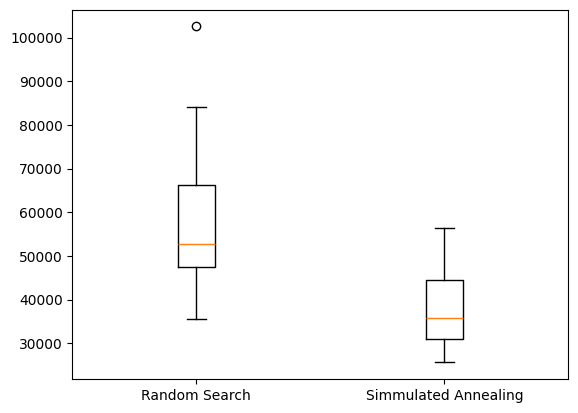

In [45]:
repeat = 21
result_random_search = [random_search(f, max_samples, 1, 16) for i in range(repeat)]
result_simmulated_annealing = [simulated_annealing(f, max_samples, 1, 16, t_initial) for i in range(repeat)]
print(result_random_search)
print(result_simmulated_annealing)

plot.boxplot([result_random_search, result_simmulated_annealing])
plot.xticks([1,2], ['Random Search', 'Simmulated Annealing'])

In [46]:
import scipy
from scipy.stats import mannwhitneyu
print(mannwhitneyu(result_random_search, result_simmulated_annealing, alternative="greater"))
stat, p_value = mannwhitneyu(result_random_search, result_simmulated_annealing, alternative="greater")

alpha_value = 0.05
if p_value < alpha_value:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

MannwhitneyuResult(statistic=398.0, pvalue=4.2425071105196244e-06)
Reject the null hypothesis


As we reject the null hypothesis, it means the 2 optimisers do have significant differences.

Random search has a bigger distribution and wider range between the minimum and maximum. The median, first and third quartile are also higher. 

Simmulated annealing has a more condensed distrubution, the difference between the maximum and the minimum is not as far apart. The median, first and third quartile are closer related to other set of values. Its results are more stablised and condensed.